# Pandas
- Pandas Lib 설치
  - !pip install pandas 
  - !pip install seaborn 
- api : https://pandas.pydata.org/docs/reference/frame.html 
- 연습 문제 : https://wikidocs.net/book/4852

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

## 자료형

### Series 자료형
* 1차원 배열
* index, value 구성
* 하나의 데이터 타입만 올 수 있다.
* numpy 기반으로 만들어진 lib로 통계 연산이 가능

In [109]:
su=pd.Series([10, 20, 30, 40])
su, type(su)      # <class 'pandas.core.series.Series'>

(0    10
 1    20
 2    30
 3    40
 dtype: int64,
 pandas.core.series.Series)

In [110]:
# index값 지정
pd.Series(data=[1, 2, 3], index=['A', 'B', 'C'])
pd.Series([1, 2, 3], ['A', 'B', 'C'])          # 생략 가능
pd.Series([1, 2, 3], index=['A', 'B', 'C'])    # 가장 많이 사용하는 형태

A    1
B    2
C    3
dtype: int64

### DataFrame 자료형
* 2차원 배열
* index, values, columns 구성
* 실무에서 가장 많이 사용하는 형태

In [111]:
df=pd.DataFrame([[71, 72, 73], 
                 [84, 85, 86], 
                 [97, 98, 99]])
df, type(df)                 # <class 'pandas.core.frame.DataFrame'>

(    0   1   2
 0  71  72  73
 1  84  85  86
 2  97  98  99,
 pandas.core.frame.DataFrame)

In [112]:
pd.DataFrame(data=[[1, 2, 3], 
                   [4, 5, 6], 
                   [7, 8, 9]],
             index=['A', 'B', 'C'],
             columns=['X1', 'X2', 'X3'])


pd.DataFrame([[1, 2, 3], 
              [4, 5, 6], 
              [7, 8, 9]],
              ['A', 'B', 'C'],
              ['X1', 'X2', 'X3'])                # 생략 가능


pd.DataFrame([[71, 72, 73], 
              [84, 85, 86], 
              [97, 98, 99]],
             columns=['X1', 'X2', 'X3'])         # 가장 많이 사용하는 형태

,X1,X2,X3
0,71,72,73
1,84,85,86
2,97,98,99


### DataFrame 생성 및 읽기
* list, ndarray, dictionary DataFrame 생성
* DataFrame을 list, ndarray, dictionary 변환
* excel file 읽고 & 쓰기

In [113]:
# list 생성
list=[[1, 2, 3, 4], 
      [5, 6, 7, 8]]
pd.DataFrame(list)

,0,1,2,3
0,1,2,3,4
1,5,6,7,8


In [114]:
# ndarray 생성
arr1=np.arange(12)
arr1

arr2=arr1.reshape(3, 4)
arr2

pd.DataFrame(arr2)

pd.DataFrame(arr2, 
            index=['one', 'two', 'three'],
            columns=['A', 'B', 'C', 'D'])

,A,B,C,D
one,0,1,2,3
two,4,5,6,7
three,8,9,10,11


In [115]:
# dictionary
dic={'A':[1, 2, 3], 
     'B':[4, 5, 6], 
     'C':[7, 8, 9]}   # ABC는 컬럼명

dic_df=pd.DataFrame(dic)
dic_df

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


In [116]:
type(dic_df)

pandas.core.frame.DataFrame

In [117]:
# DataFrame을 list, ndarray, dictionary 변환
my_list=dic_df.values.tolist()
print(my_list, type(my_list), '\n')

my_numpy=dic_df.to_numpy()
print(my_numpy, type(my_numpy), '\n')
      
my_dict=dic_df.to_dict()
print(my_dict, type(my_dict))

[[1, 4, 7], [2, 5, 8], [3, 6, 9]] <class 'list'> 

[[1 4 7]
 [2 5 8]
 [3 6 9]] <class 'numpy.ndarray'> 

{'A': {0: 1, 1: 2, 2: 3}, 'B': {0: 4, 1: 5, 2: 6}, 'C': {0: 7, 1: 8, 2: 9}} <class 'dict'>


## DDA 
* Descriptive Data Analysis (DDA, 기술적 데이터 분석) 디스크립티브 데이터 어낼러시스
* 데이터 불러오기 
* 데이터 구조와 타입 파악
* 설명 변수 및 목표 변수 설정
  - 설명 변수 (X, Input, Feature) : 결과를 설명하는 변수
  - 목표 변수 (Y, Output, Label) : 분석하려는 결과 변수
* 기술 통계량 확인
  - 평균, 합계, 최소값, 최대값 등 기본 통계량 분석
* 데이터 전처리
  - 데이터 정제, 결측치 처리, 스케일등 분석 준비 작업을 수행

### 파일 읽기

In [5]:
# csv 파일 읽기
person=pd.read_csv('./Data/pandas/01_Person.csv')    # encoding='cp949' (한글문제시)

# 전체 데이터 출력
person

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
0,HKD1,990623-2,F,161.9,22,A,A,A,4100,1975
1,HKD10,900303-2,F,169.4,31,A,A,B,4720,2970
2,HKD100,681205-2,F,168.3,55,A,A,B,7280,5905
3,HKD101,931226-2,F,155.3,28,AB,B,B,4060,2935
4,HKD102,920123-1,M,188.6,29,O,B,F,4390,4015
...,...,...,...,...,...,...,...,...,...,...
245,HKD95,730710-2,F,157.8,50,A,A,A,6990,4865
246,HKD96,720805-2,F,150.4,51,O,A,A,7110,4985
247,HKD97,710929-1,M,172.4,52,A,A,B,8000,6625
248,HKD98,701024-1,M,166.7,53,O,A,B,8760,7385


In [151]:
# 맨 앞부터 데이터 추출
person.head()             # 기본값 5개
person.head(2)          

# 맨 뒤부터 데이터 추출 
person.tail()
person.tail(2)

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
248,HKD98,701024-1,M,166.7,53,O,A,B,8760,7385
249,HKD99,691115-2,F,152.6,54,B,A,B,7470,6095


### 데이터 구조 파악 
* 데이터 구조
  - index : 데이터의 순서 (데이터의 개수)
  - columns : 데이터의 항목 (각 항목의 데이터 타입을 확인, 하나의 항목에는 한가지 타입밖에 올 수 없다(RDB))
  - values : 데이터 값, 데이터의 형식 (Format) / 예) 남, 남성, 남자 확인
* 데이터의 타입
  - 연속형(숫자)
  - 범주형(문자)
  - 순서형(날짜)

In [154]:
# 속성을 통해, 데이터 요약 정보를 확인 
person.ndim           # 객체의차원 / 2
person.shape          # 객체의 사이즈 / (250, 10)
person.columns        # 컬럼명 
person.dtypes         # 데이터타입 / oject, int64

name            object
jumin7          object
gender          object
height         float64
age              int64
blood_type      object
company         object
grades          object
salary           int64
expenditure      int64
dtype: object

In [156]:
# 데이터 요약 정보 : 사이즈, 컬럼명, 데이터타입  
person.info()          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         250 non-null    object 
 1   jumin7       250 non-null    object 
 2   gender       250 non-null    object 
 3   height       250 non-null    float64
 4   age          250 non-null    int64  
 5   blood_type   250 non-null    object 
 6   company      250 non-null    object 
 7   grades       250 non-null    object 
 8   salary       250 non-null    int64  
 9   expenditure  250 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 19.7+ KB


### 기술적 통계량

#### 단일 컬럼 - 연속형 

In [160]:
# 기술적 통계량 
print("평균값:", person['age'].mean())
print("중앙값:", person['age'].median())
print()

# 이상치 확인
print("최소값:", person['age'].min())      
print("최대값:", person['age'].max())
print()

# 편차 제곱의 평균과 편차 제곱의 제곱근 
print("분산:", person['age'].var())
print("표준편차:", person['age'].std())           # 평균(39)로부터 8살 떨어져 있다.   

person['age'].describe()                         
#person['age'].describe().astype(int)             # 결과를 정수형으로 반환 

# 사분범위 (Inter Quantile Range IQR / BoxPlot)
# 25% (1사분위수, Q3) : 전체 데이터에서 순서대로 나열 시, 아래 25%는 33세 이하의 나이를 가집니다.
# 50% (중앙값, 2사분위수, Q2) : 전체 데이터에서 50%는 39세 이하, 50%는 39세 이상입니다.
# 75% (3사분위수, Q3) : 전체 데이터에서 순서대로 나열 시, 위 75%는 46세 이하의 나이

평균값: 39.24
중앙값: 39.0

최소값: 20
최대값: 55

분산: 74.88995983935737
표준편차: 8.653898534149645


count    250.000000
mean      39.240000
std        8.653899
min       20.000000
25%       33.000000
50%       39.000000
75%       46.000000
max       55.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

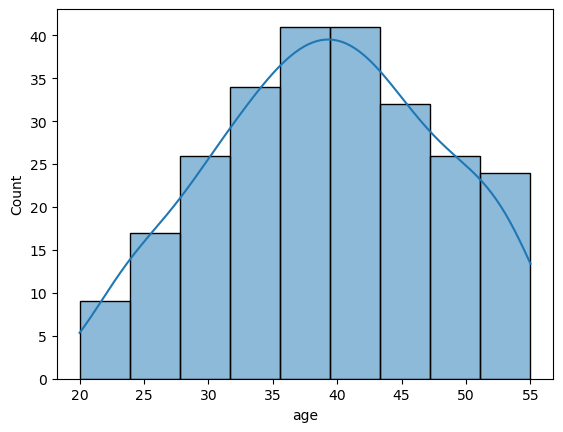

In [162]:
sns.histplot(data=person, x='age', kde=True)         # 분포 확인

#### 전체 컬럼 - 연속형

In [165]:
person[['age', 'salary']].mean()    # 다(다중) 컬럼

age         39.24
salary    6357.48
dtype: float64

In [167]:
# person.describe()
# person.describe().T
# person.describe().round()
# person.describe().astype(int)     

person.describe().T

,count,mean,std,min,25%,50%,75%,max
height,250.0,169.5692,12.283857,148.1,159.30,168.75,180.375,191.8
age,250.0,39.2400,8.653899,20.0,33.00,39.00,46.000,55.0
salary,250.0,6357.4800,1849.791383,3080.0,5002.50,6100.00,7427.500,11990.0
expenditure,250.0,4971.4800,1861.112508,1330.0,3593.75,4762.50,6272.500,10865.0


In [169]:
# df.describe(include='all')    # 전체 데이터

#### 빈도수 - 범주형 

In [172]:
# 범주형(문자형) 통계량 - 빈도수
print(person['gender'].nunique(), '\n')        # 데이터(빈도) 값 개수  2
print(person['gender'].unique(), '\n')         # 데이터(빈도) 값 내용  ['F' 'M'] 
print(person['gender'].value_counts())         # 데이터 값과 빈도수  M  138, F 112

# person['blood_type'].value_counts()

2 

['F' 'M'] 

gender
M    138
F    112
Name: count, dtype: int64


In [174]:
# 범주형(문자형) 전체 컬럼 통계량 - 갯수, 항목 수, 가장 많이 빈도를 차지하는 항목, 가장 많이 빈도를 차지하는 항목 빈도수
person.describe(include='object')

,name,jumin7,gender,blood_type,company,grades
count,250,250,250,250,250,250
unique,250,240,2,4,3,5
top,HKD1,890419-1,M,A,A,B
freq,1,3,138,84,100,116


#### 날짜 - 순서형
* object >> datetime64

In [179]:
person['jumin7'].head(3)                

0    990623-2
1    900303-2
2    681205-2
Name: jumin7, dtype: object

In [181]:
date_person=pd.DataFrame(person['jumin7'])   #  새로운 데이터 프레임 생성
date_person.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   jumin7  250 non-null    object
dtypes: object(1)
memory usage: 2.1+ KB


In [183]:
# object >> datetime64
date_person['jumin']=pd.to_datetime(date_person['jumin7'], format='%y%m%d-%w')
date_person.head()      # 2000년도 기준으로 처리 2068

,jumin7,jumin
0,990623-2,1999-06-23
1,900303-2,1990-03-03
2,681205-2,2068-12-05
3,931226-2,1993-12-26
4,920123-1,1992-01-23


In [185]:
# 현재 년도를 가져오기
current_year=pd.Timestamp.now().year
current_year      # 2025

# 'jumin' 컬럼에서 년도가 2025년보다 큰 값을 필터링하는 조건 생성
cond=date_person['jumin'].dt.year > current_year
cond

# 조건이 참인 행들의 'jumin' 컬럼에서 100년을 빼서 수정
date_person.loc[cond, 'jumin'] -= pd.DateOffset(years=100)
date_person.head()

,jumin7,jumin
0,990623-2,1999-06-23
1,900303-2,1990-03-03
2,681205-2,1968-12-05
3,931226-2,1993-12-26
4,920123-1,1992-01-23


In [187]:
# 년, 월, 일, 요일, 요일명
date_person['year']=date_person['jumin'].dt.year
date_person['month']=date_person['jumin'].dt.month
date_person['day']=date_person['jumin'].dt.day

date_person['weekday']=date_person['jumin'].dt.weekday         # 0월요일 ~ 6일요일
date_person['day_name']=date_person['jumin'].dt.day_name()

date_person.head()

,jumin7,jumin,year,month,day,weekday,day_name
0,990623-2,1999-06-23,1999,6,23,2,Wednesday
1,900303-2,1990-03-03,1990,3,3,5,Saturday
2,681205-2,1968-12-05,1968,12,5,3,Thursday
3,931226-2,1993-12-26,1993,12,26,6,Sunday
4,920123-1,1992-01-23,1992,1,23,3,Thursday


In [49]:
# Python map() : map(function, iterable[, iterable2, ...]) 
#                map(함수이름, 데이터 집합...)

# CASE-1)
def sub1(x):
    imsi=[]
    for i in x:
        imsi.append(i ** 2)
    return imsi
sub1([1, 2, 3, 4])

# CASE-2)
def sub2(x):
    return x ** 2
imis=map(sub2, [1, 2, 3, 4])
list(imis)

# CASE-3)
def sub3(x, y):
    return x * y
imsi=map(sub3, [10, 20, 30], [4, 5, 6])
list(imsi)

[40, 100, 180]

In [196]:
# 요일명 한글로 바꾸기
english_to_korean={                # 영어요일 이름과 한글요일 이름 매핑
    'Monday':'월요일',
    'Tuesday':'화요일',
    'Wednesday':'수요일',
    'Thursday':'목요일',
    'Friday':'금요일',
    'Saturday':'토요일',
    'Sunday':'일요일'
}

# pandas에서 주로 mapping 할때 사용, 반환형은 시리즈
date_person['korean_day_names']=date_person['day_name'].map(english_to_korean)   # 시리즈 반환
date_person.head()

,jumin7,jumin,year,month,day,weekday,day_name,korean_day_names
0,990623-2,1999-06-23,1999,6,23,2,Wednesday,수요일
1,900303-2,1990-03-03,1990,3,3,5,Saturday,토요일
2,681205-2,1968-12-05,1968,12,5,3,Thursday,목요일
3,931226-2,1993-12-26,1993,12,26,6,Sunday,일요일
4,920123-1,1992-01-23,1992,1,23,3,Thursday,목요일


### 결측치 
* 데이터에서 값이 없거나 비어 있는 상태

In [52]:
person_na=pd.read_csv('./Data/pandas/02_Person_na.csv')
person_na.shape

(250, 10)

#### 결손 데이터 확인

In [214]:
person_na.info()      # age, blood_type, salary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         250 non-null    object 
 1   jumin7       250 non-null    object 
 2   gender       250 non-null    object 
 3   height       250 non-null    float64
 4   age          234 non-null    float64
 5   blood_type   234 non-null    object 
 6   company      250 non-null    object 
 7   grades       250 non-null    object 
 8   salary       234 non-null    float64
 9   expenditure  250 non-null    int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 19.7+ KB


In [216]:
person_na.isna()               # True, False 반환
person_na.isna().sum()         # 또는 person_na.isnull().sum()

name            0
jumin7          0
gender          0
height          0
age            16
blood_type     16
company         0
grades          0
salary         16
expenditure     0
dtype: int64

#### 결측치 삭제

In [219]:
drop_person_na=person_na.copy()
drop_person_na.dropna(inplace=True)    # inplace=True 삭제 안됨

In [221]:
drop_person_na.isna().sum()      

name           0
jumin7         0
gender         0
height         0
age            0
blood_type     0
company        0
grades         0
salary         0
expenditure    0
dtype: int64

#### 결측치 대체 
* 연속형(숫자) - 평균 또는 중앙값으로 대체
* 범주형(문자) - 최빈수 대체

In [224]:
replace_person_na=person_na.copy()
replace_person_na.isna().sum()

name            0
jumin7          0
gender          0
height          0
age            16
blood_type     16
company         0
grades          0
salary         16
expenditure     0
dtype: int64

In [228]:
# 나이는 평균값으로 대체 - 연속형
age_avg=replace_person_na['age'].mean().astype(int)     # 39     
replace_person_na['age']=replace_person_na['age'].fillna(age_avg)
replace_person_na.isna().sum()

# 연봉은 중앙값으로 대체  - 연속형
salary_median=int(replace_person_na['salary'].median())   # 단일 값에서 astype 사용 못함
replace_person_na['salary']=replace_person_na['salary'].fillna(salary_median)
replace_person_na.isna().sum()

name            0
jumin7          0
gender          0
height          0
age             0
blood_type     16
company         0
grades          0
salary          0
expenditure     0
dtype: int64

In [178]:
# 혈액형은 최빈값으로 대체 - 범주형
replace_person_na['blood_type'].value_counts()   
replace_person_na['blood_type'].mode()   #  0  A / Series 반환

blood_type_mode=replace_person_na['blood_type'].mode()[0]      
replace_person_na['blood_type']=replace_person_na['blood_type'].fillna(blood_type_mode)

replace_person_na.head()
replace_person_na.isna().sum()

name           0
jumin7         0
gender         0
height         0
age            0
blood_type     0
company        0
grades         0
salary         0
expenditure    0
dtype: int64

#### 이상치
* 정상 범위에서 크게 벗어난 값
* 이상치가 들어 있으면 분석 결과에서 왜곡이 발생한다.
* 이상치 >> 결측치 >> 삭제 또는 대체

In [193]:
imsi=pd.DataFrame({'gender': [1, 2, 1, 3, 1, 2],         # 성별 남녀(1, 2) / 이상치는 3
                   'score': [5, 4, 3, 4, 2, 116]})       # 점수는 1~5 범위 / 이상치는 116
imsi

,gender,score
0,1,5
1,2,4
2,1,3
3,3,4
4,1,2
5,2,116


In [195]:
imsi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   gender  6 non-null      int64
 1   score   6 non-null      int64
dtypes: int64(2)
memory usage: 228.0 bytes


In [197]:
# 이상치 확인
imsi['gender'].value_counts().sort_index()
imsi['score'].value_counts().sort_index()

score
2      1
3      1
4      2
5      1
116    1
Name: count, dtype: int64

In [199]:
imsi.describe().T     # max, min 이상치 확인

,count,mean,std,min,25%,50%,75%,max
gender,6.0,1.666667,0.816497,1.0,1.00,1.5,2.00,3.0
score,6.0,22.333333,45.898439,2.0,3.25,4.0,4.75,116.0


In [204]:
result_imsi=imsi.copy()

# 반복을 사용하지 않고 np.where(condition, true value, false value)
result_imsi['gender']=np.where(result_imsi['gender']==3, np.nan, result_imsi['gender'])
result_imsi['score']=np.where(result_imsi['score'] > 6, np.nan, result_imsi['score'])
result_imsi     # 또는 df.value_counts().sort_index(), df.isna().sum()               

result_imsi.dropna(inplace=True)   
result_imsi.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4.0,1.25,0.500000,1.0,1.00,1.0,1.25,2.0
score,4.0,3.50,1.290994,2.0,2.75,3.5,4.25,5.0


In [206]:
result_imsi.info()            #  NaN은 부동 소수점 수로 표현되기 때문에, 정수형(int64)에서는 NaN 값을 사용할 수 없음

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  4 non-null      float64
 1   score   4 non-null      float64
dtypes: float64(2)
memory usage: 96.0 bytes


In [231]:
# 원래 자료형으로 바꾸기 
result_imsi['gender']=result_imsi['gender'].astype(int)
result_imsi['score']=result_imsi['score'].astype(int)
result_imsi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   gender  4 non-null      int32
 1   score   4 non-null      int32
dtypes: int32(2)
memory usage: 64.0 bytes


## 변형
- 데이터의 품질을 높이기 위해 불필요한 부분을 제거하고, 필요한 부분을 정리하는 과정
- 정렬, 필터링, 구조 변경 등등

### 데이터 필터링
* indexing & slicing
* iloc[row, column] : 위치 기반  인덱싱
* loc[row, column] : 명칭 기반 인덱싱
* boolean indexing : 조건기반 인덱싱
* query() 

#### row
* DataFrame 반환

In [5]:
person=pd.read_csv('./Data/pandas/01_person.csv')
person.shape

(250, 10)

In [151]:
person[:2]              # 0행 ~ 2행 전 (모든 열)

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
0,HKD1,990623-2,F,161.9,22,A,A,A,4100,1975
1,HKD10,900303-2,F,169.4,31,A,A,B,4720,2970


In [152]:
person[150:]             # 150행 ~ 끝행까지 (모든 열)

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
150,HKD234,880513-2,F,150.7,33,AB,C,B,8450,7325
151,HKD235,870622-2,F,153.5,34,O,C,A,10800,8675
152,HKD236,860621-1,M,166.2,35,A,C,B,10410,9285
153,HKD237,850118-2,F,160.7,36,O,C,B,10480,9355
154,HKD238,840720-2,F,156.8,37,A,C,B,9380,8255
...,...,...,...,...,...,...,...,...,...,...
245,HKD95,730710-2,F,157.8,50,A,A,A,6990,4865
246,HKD96,720805-2,F,150.4,51,O,A,A,7110,4985
247,HKD97,710929-1,M,172.4,52,A,A,B,8000,6625
248,HKD98,701024-1,M,166.7,53,O,A,B,8760,7385


In [153]:
person[2:5]             # 2행 ~ 4행 (모든 열)

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
2,HKD100,681205-2,F,168.3,55,A,A,B,7280,5905
3,HKD101,931226-2,F,155.3,28,AB,B,B,4060,2935
4,HKD102,920123-1,M,188.6,29,O,B,F,4390,4015


#### column 
* Series 또는 DataFrame 반환

In [154]:
person['age']        #  Series 객체를 반환
person[['age']]      #  DataFrame 반환식

,age
0,22
1,31
2,55
3,28
4,29
...,...
245,50
246,51
247,52
248,53


In [155]:
# 여러개 column을 list로 입력하면 column들로 구성된 DataFrame을 반환
person[['age', 'jumin7']]   

,age,jumin7
0,22,990623-2
1,31,900303-2
2,55,681205-2
3,28,931226-2
4,29,920123-1
...,...,...
245,50,730710-2
246,51,720805-2
247,52,710929-1
248,53,701024-1


#### iloc
* iloc[row, column] 
* 위치 기반  인덱싱

In [157]:
person.iloc[:, 0:5]       # 모든 행,  열 0 ~ 4
person.iloc[:3, :]        # 행 0 ~ 2, 모든 열   person.iloc[:3, ]  열은 생략 가능, 행 불가능 

person.iloc[:4, :3]       # 행 0 ~ 3, 열 0 ~ 2
person.iloc[5:15, 2:5]    # 행 5 ~ 14, 열 5 ~ 4
person.iloc[:3, :-1]      # 행 0 ~ 2, 마지막 열 제외
person.iloc[:3, -1:]      # 행 0 ~ 2, 마지막 열만 

,expenditure
0,1975
1,2970
2,5905


In [158]:
person.iloc[[1, 3, 5], [0, 2, 4, 5, 6, 8]]     # 행 1,3,5 선택,  열 0,2,4,5,6,8 선택

,name,gender,age,blood_type,company,salary
1,HKD10,F,31,A,A,4720
3,HKD101,F,28,AB,B,4060
5,HKD103,F,30,A,B,3290


#### loc
* loc[row, column] : 명칭 기반 인덱싱

In [160]:
person.loc[:, 'name':'height']
person.loc[:5, :]                # :생략 가능 person.loc[:5, ]

person.loc[2:10, :'company']    # company 포함
person.loc[2:10, 'name':'expenditure']                        
person.loc[2:10, ['name', 'grades', 'company']]
person.loc[[1, 3, 5], ['name', 'grades', 'company']]

,name,grades,company
1,HKD10,B,A
3,HKD101,B,B
5,HKD103,A,B


#### 조건기반 인덱싱 
* 조건기반 인덱싱 (boolean indexing)
    - 문법: 데이터프레임의 조건식을 직접 사용하여 필터링합니다.
    - 예: df[df['column'] > value]
    - 장점: Python 코드의 기본 문법을 사용하므로 직관적이고 유연하게 사용할 수 있습니다.
    - 단점: 복잡한 조건을 쓸 경우 가독성이 떨어질 수 있습니다.

In [161]:
person['age']==31            # True, False

0      False
1       True
2      False
3      False
4      False
       ...  
245    False
246    False
247    False
248    False
249    False
Name: age, Length: 250, dtype: bool

In [162]:
# 나이가 30이상인 사원 정보 출력
person[person['age'] > 30].head()

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
1,HKD10,900303-2,F,169.4,31,A,A,B,4720,2970
2,HKD100,681205-2,F,168.3,55,A,A,B,7280,5905
12,HKD11,890419-1,M,188.2,32,B,A,B,4820,3070
16,HKD113,900303-2,F,161.9,31,A,B,D,3540,2790
17,HKD114,890419-2,F,157.5,32,B,B,A,4040,2665


In [163]:
#  나이가 30이면서  B회사에 다니는 사원 출력
cond=(person['age']==30) & (person['company']=='B')  # 괄호 반드시
person[cond]                    

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
5,HKD103,910215-2,F,150.2,30,A,B,A,3290,1915
15,HKD112,910113-2,F,166.2,30,B,B,D,3260,2510
43,HKD138,910213-2,F,168.8,30,O,B,A,4060,2685
65,HKD158,910213-1,M,186.7,30,A,B,B,3980,2855


In [164]:
# 조건으로 행을 추출 후, 원하는 열 추출하기
cond=person['age']==30
person_cond=person[cond]                      # 행 추출
person_cond.head()

person_cond[['name', 'blood_type']]           # 행열 추출
person_cond.loc[:, 'name':'age']              # 행열 추출
person_cond.iloc[:, 0:5]                      # 행열 추출

,name,jumin7,gender,height,age
5,HKD103,910215-2,F,150.2,30
15,HKD112,910113-2,F,166.2,30
43,HKD138,910213-2,F,168.8,30
65,HKD158,910213-1,M,186.7,30
127,HKD213,910216-2,F,158.3,30
147,HKD231,910217-2,F,159.6,30
165,HKD248,910218-2,F,168.2,30
179,HKD35,910214-1,M,167.4,30
239,HKD9,910913-1,M,168.3,30


#### query 함수
- 조건에 맞는 데이터만 추출
  - 문법: 문자열 표현식을 사용하여 필터링합니다.
  - 예: df.query('column > value')
  - 장점: SQL 스타일의 문법을 사용하여 가독성이 좋고, 복잡한 조건을 더 간단하게 표현할 수 있습니다.
  - 단점: 문자열 내부에서 변수 사용 시, @ 기호를 사용해야 하므로 다소 불편할 수 있습니다. 

* 조건기반 인덱싱 query함수 차이
    - 조건 기반 필터링: Python 문법, 직관적. 
    
- query 함수: SQL 스타일, 가독성 높음.
- 상황에 따라 더 적합한 방법을 선택하면 됩니다!

In [165]:
person.query('age > 30').head()       # DataFrame 반환

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
1,HKD10,900303-2,F,169.4,31,A,A,B,4720,2970
2,HKD100,681205-2,F,168.3,55,A,A,B,7280,5905
12,HKD11,890419-1,M,188.2,32,B,A,B,4820,3070
16,HKD113,900303-2,F,161.9,31,A,B,D,3540,2790
17,HKD114,890419-2,F,157.5,32,B,B,A,4040,2665


In [166]:
person.query('age==30 & company=="B"')

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
5,HKD103,910215-2,F,150.2,30,A,B,A,3290,1915
15,HKD112,910113-2,F,166.2,30,B,B,D,3260,2510
43,HKD138,910213-2,F,168.8,30,O,B,A,4060,2685
65,HKD158,910213-1,M,186.7,30,A,B,B,3980,2855


In [167]:
person.query('age==30 & company=="B"')['age']
person.query('age==30 & company=="B"')[['name', 'age']]

,name,age
5,HKD103,30
15,HKD112,30
43,HKD138,30
65,HKD158,30


In [168]:
result_df=person.query('age == 30')         # 행 추출

result_df[['name', 'blood_type']]  
result_df.loc[:, 'name':'age']              # 행열 추출
result_df.iloc[:, 0:5]  

,name,jumin7,gender,height,age
5,HKD103,910215-2,F,150.2,30
15,HKD112,910113-2,F,166.2,30
43,HKD138,910213-2,F,168.8,30
65,HKD158,910213-1,M,186.7,30
127,HKD213,910216-2,F,158.3,30
147,HKD231,910217-2,F,159.6,30
165,HKD248,910218-2,F,168.2,30
179,HKD35,910214-1,M,167.4,30
239,HKD9,910913-1,M,168.3,30


In [254]:
# 총 정리

# 행 (슬라이싱 된다.)
person[:1]
person.head(1)                 
person[2:5]                   

# 열 (슬라이싱 안된다. iloc, loc 사용)
person['age']
person[['age', 'jumin7']]     
# person[['name':'company']]     ERROR

# idx 기반 (행열)
person.iloc[:3, :4]
person.iloc[:3, [0, 1, 2]]    

# 명칭 기반 (행열)
person.loc[3:10, 'name':'height']
person.loc[3:10, ['name', 'company', 'grades']] 

# 조건 (boolean)
cond=person['age'] > 30      
df=person[cond]
df.iloc[:5, :3]

# query(함수)
df=person.query("age > 30 & company == 'A'")  
df.iloc[:5, :3]

# 비교 (list, 그외)
a=[[1, 2, 3], [4, 5, 6]]
a[1][2]

b=np.arange(16)
b=b.reshape(4, 4)
b[1:5, [1, 2]]

array([[ 5,  6],
       [ 9, 10],
       [13, 14]])

#### 행 & 열 단위별 결합

In [16]:
person=pd.read_csv('./Data/pandas/01_Person.csv')

# 행단위 결합
person_up=person.iloc[:5, :]
person_down=person.iloc[-5:, :]
person_row_concat=pd.concat([person_up, person_down], axis=0)         # default axis=0으로 생략 가능
person_row_concat

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
0,HKD1,990623-2,F,161.9,22,A,A,A,4100,1975
1,HKD10,900303-2,F,169.4,31,A,A,B,4720,2970
2,HKD100,681205-2,F,168.3,55,A,A,B,7280,5905
3,HKD101,931226-2,F,155.3,28,AB,B,B,4060,2935
4,HKD102,920123-1,M,188.6,29,O,B,F,4390,4015
245,HKD95,730710-2,F,157.8,50,A,A,A,6990,4865
246,HKD96,720805-2,F,150.4,51,O,A,A,7110,4985
247,HKD97,710929-1,M,172.4,52,A,A,B,8000,6625
248,HKD98,701024-1,M,166.7,53,O,A,B,8760,7385
249,HKD99,691115-2,F,152.6,54,B,A,B,7470,6095


In [174]:
# 열단위 결합
person_left=person.loc[:5, :'age']
person_right=person.loc[:5, 'grades':]
person_colum_concat=pd.concat([person_left, person_right], axis=1)
person_colum_concat

,name,jumin7,gender,height,age,grades,salary,expenditure
0,HKD1,990623-2,F,161.9,22,A,4100,1975
1,HKD10,900303-2,F,169.4,31,B,4720,2970
2,HKD100,681205-2,F,168.3,55,B,7280,5905
3,HKD101,931226-2,F,155.3,28,B,4060,2935
4,HKD102,920123-1,M,188.6,29,F,4390,4015
5,HKD103,910215-2,F,150.2,30,A,3290,1915


### 구조 변경
* Column 생성, 수정, 삭제
* 행 & 열 단위별 결합

In [23]:
person=pd.read_csv('./Data/pandas/01_person.csv')
person.shape

(250, 10)

In [176]:
copy_person=person.copy()
copy_person.shape

(250, 10)

#### 추가

In [177]:
# 생성 - column 추가
copy_person['point']=0
copy_person.head(2)

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure,point
0,HKD1,990623-2,F,161.9,22,A,A,A,4100,1975,0
1,HKD10,900303-2,F,169.4,31,A,A,B,4720,2970,0


In [178]:
# 생성 - column 추가 후 원하는 위치
imsi=copy_person['age']+10

copy_person.insert(loc=copy_person.columns.get_loc('age') + 1, 
                   column='imis', 
                   value=imsi)
copy_person.head(2)

,name,jumin7,gender,height,age,imis,blood_type,company,grades,salary,expenditure,point
0,HKD1,990623-2,F,161.9,22,32,A,A,A,4100,1975,0
1,HKD10,900303-2,F,169.4,31,41,A,A,B,4720,2970,0


#### 수정

In [179]:
# 수정 - column명 변경
copy_person.rename(columns={'gender':'성별'}, inplace=True)    # inplace=True 작성안하면 삭제 안됨
copy_person.head(2)

,name,jumin7,성별,height,age,imis,blood_type,company,grades,salary,expenditure,point
0,HKD1,990623-2,F,161.9,22,32,A,A,A,4100,1975,0
1,HKD10,900303-2,F,169.4,31,41,A,A,B,4720,2970,0


#### 삭제

In [180]:
# colum 방향으로 삭제
copy_person.drop(columns='point', axis=1, inplace=True)
copy_person.head(2)

# 두개 이상 colum 삭제는 list 입력
copy_person.drop(columns=['age', 'salary', 'expenditure'], 
                 axis=1, 
                 inplace=True)   # 슬라이싱 안됨
copy_person.head(2)

,name,jumin7,성별,height,imis,blood_type,company,grades
0,HKD1,990623-2,F,161.9,32,A,A,A
1,HKD10,900303-2,F,169.4,41,A,A,B


In [181]:
# row 방향 삭제 
copy_person.drop(index=0, axis=0, inplace=True)
copy_person.head()

copy_person.drop(index=[1, 2, 3], axis=0, inplace=True)
copy_person.head()

,name,jumin7,성별,height,imis,blood_type,company,grades
4,HKD102,920123-1,M,188.6,39,O,B,F
5,HKD103,910215-2,F,150.2,40,A,B,A
6,HKD104,990623-1,M,176.0,32,A,B,A
7,HKD105,980717-2,F,163.4,33,B,B,B
8,HKD106,970818-1,M,186.3,34,AB,B,C


### 정렬
- 단일, 다수 컬럼 정렬
- 내림차순, 오름차순 정렬

#### 단일 컬럼 

In [33]:
person=pd.read_csv('./Data/pandas/01_person.csv')
person.shape

(250, 10)

In [187]:
# 나이 정렬
person.sort_values(by='age')    # 원본 데이터 영향을 안 준다. by 생략 가능
person.sort_values('age').head(5)

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
164,HKD247,000526-3,M,189.4,20,A,C,B,5540,4165
138,HKD223,990625-1,M,169.3,22,A,C,B,4970,3220
118,HKD205,990624-2,F,160.3,22,A,C,A,5040,2915
6,HKD104,990623-1,M,176.0,22,A,B,A,3750,2375
0,HKD1,990623-2,F,161.9,22,A,A,A,4100,1975


In [188]:
# 혈액형 내림 차순 정렬
sort_blood_type=person.sort_values('blood_type', ascending=False)    # ascending=True default 
sort_blood_type.head()

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
93,HKD183,811011-2,F,152.0,40,O,B,A,5410,4035
63,HKD156,730116-2,F,153.2,48,O,B,B,6440,5315
134,HKD22,780912-1,M,183.4,43,O,A,A,6610,4485
73,HKD165,841017-1,M,180.1,37,O,B,B,4390,3265
224,HKD76,681203-1,M,173.6,55,O,A,B,9120,7995


#### 다수(n개) 컬럼 

In [189]:
# 혈액형, 나이 오름차순 정렬
sort_blood_type_age=person.sort_values(['blood_type', 'age'])     # 오름, 오름 
sort_blood_type_age.head()

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
164,HKD247,000526-3,M,189.4,20,A,C,B,5540,4165
0,HKD1,990623-2,F,161.9,22,A,A,A,4100,1975
6,HKD104,990623-1,M,176.0,22,A,B,A,3750,2375
118,HKD205,990624-2,F,160.3,22,A,C,A,5040,2915
138,HKD223,990625-1,M,169.3,22,A,C,B,4970,3220


In [190]:
# 혈액형, 나이 내림차순 정렬 - ascending(True/False) 
sort_desc=person.sort_values(['blood_type', 'age'], ascending=False)   # 내림, 오름
sort_desc.head() 

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
207,HKD60,681202-1,M,186.0,55,O,A,B,9440,8315
224,HKD76,681203-1,M,173.6,55,O,A,B,9120,7995
41,HKD136,690111-2,F,164.7,54,O,B,C,6440,5315
177,HKD33,691111-2,F,166.8,54,O,A,A,7520,5395
204,HKD58,701021-1,M,188.0,53,O,A,B,8000,6875


In [191]:
# 혈액형 내림, 나이 오름
sort_desc_asc=person.sort_values(['blood_type', 'age'], ascending=[False, False])   # 내림, 내림
sort_desc_asc.head()

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
207,HKD60,681202-1,M,186.0,55,O,A,B,9440,8315
224,HKD76,681203-1,M,173.6,55,O,A,B,9120,7995
41,HKD136,690111-2,F,164.7,54,O,B,C,6440,5315
177,HKD33,691111-2,F,166.8,54,O,A,A,7520,5395
204,HKD58,701021-1,M,188.0,53,O,A,B,8000,6875


### 값 변경 및 등급화
* replace()
* apply() : apply()를 사용하면 각 요소에 대해 지정한 함수를 적용
  - apply(function, axis=0/1 행/열, args=(), **kwargs)
* map() : 값 mapping
  - map(function, iterable[, iterable2, ...])
* 람다 : 함수이름 = lamba input : output

#### 값 변경

In [37]:
person=pd.read_csv('./Data/pandas/01_person.csv')
person.head()

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
0,HKD1,990623-2,F,161.9,22,A,A,A,4100,1975
1,HKD10,900303-2,F,169.4,31,A,A,B,4720,2970
2,HKD100,681205-2,F,168.3,55,A,A,B,7280,5905
3,HKD101,931226-2,F,155.3,28,AB,B,B,4060,2935
4,HKD102,920123-1,M,188.6,29,O,B,F,4390,4015


In [266]:
df=person.copy()

# 1개 값 변경
df['gender']=df['gender'].replace('F', 'Female')
df.head()

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
0,HKD1,990623-2,Female,161.9,22,A,A,A,4100,1975
1,HKD10,900303-2,Female,169.4,31,A,A,B,4720,2970
2,HKD100,681205-2,Female,168.3,55,A,A,B,7280,5905
3,HKD101,931226-2,Female,155.3,28,AB,B,B,4060,2935
4,HKD102,920123-1,M,188.6,29,O,B,F,4390,4015


In [268]:
# n개의 값 변경

df['gender']=df['gender'].replace({'Female':'여자', 'M':'남자'})  # 또는  # df['gender'].map({'F':'female', 'M':'man'})
df.head()

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
0,HKD1,990623-2,여자,161.9,22,A,A,A,4100,1975
1,HKD10,900303-2,여자,169.4,31,A,A,B,4720,2970
2,HKD100,681205-2,여자,168.3,55,A,A,B,7280,5905
3,HKD101,931226-2,여자,155.3,28,AB,B,B,4060,2935
4,HKD102,920123-1,남자,188.6,29,O,B,F,4390,4015


In [270]:
df['gender'].value_counts()

gender
남자    138
여자    112
Name: count, dtype: int64

In [272]:
# apply lambad 식으로 데이터 가공  - 시리즈, 데이터 프레임 다 사용 가능

df['name_length']=df['name'].apply(lambda x:len(x))     # 해당열의 문자열에서 길이를 계산 열 추가 
df.head()

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure,name_length
0,HKD1,990623-2,여자,161.9,22,A,A,A,4100,1975,4
1,HKD10,900303-2,여자,169.4,31,A,A,B,4720,2970,5
2,HKD100,681205-2,여자,168.3,55,A,A,B,7280,5905,6
3,HKD101,931226-2,여자,155.3,28,AB,B,B,4060,2935,6
4,HKD102,920123-1,남자,188.6,29,O,B,F,4390,4015,6


In [276]:
# 해당열(jumin7)의 문자열에서 0번지 부터 6번지 전까지 문자를 추출
df['jumin7'].apply(lambda x: x[0:6])

#  '19'라는 문자열과 x[0:6]의 6자리를 결합하여 새로운 문자열을 만듬
df['jumin7'].apply(lambda x: '19' + x[0:6])

0      19990623
1      19900303
2      19681205
3      19931226
4      19920123
         ...   
245    19730710
246    19720805
247    19710929
248    19701024
249    19691115
Name: jumin7, Length: 250, dtype: object

In [278]:
df['jumin7']=df['jumin7'].apply(lambda x: '19' + x[0:6])
df.head()

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure,name_length
0,HKD1,19990623,여자,161.9,22,A,A,A,4100,1975,4
1,HKD10,19900303,여자,169.4,31,A,A,B,4720,2970,5
2,HKD100,19681205,여자,168.3,55,A,A,B,7280,5905,6
3,HKD101,19931226,여자,155.3,28,AB,B,B,4060,2935,6
4,HKD102,19920123,남자,188.6,29,O,B,F,4390,4015,6


In [280]:
def asd(x):
   if x <=20: 
       return '10대'
   elif x <=30: 
       return '20대'
   elif x <=40: 
       return '30대'
   elif x <=50: 
       return '40대'
   else: 
       return '50대이상'

df['age_range']=df['age'].apply(lambda x: asd(x))
df.head()

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure,name_length,age_range
0,HKD1,19990623,여자,161.9,22,A,A,A,4100,1975,4,20대
1,HKD10,19900303,여자,169.4,31,A,A,B,4720,2970,5,30대
2,HKD100,19681205,여자,168.3,55,A,A,B,7280,5905,6,50대이상
3,HKD101,19931226,여자,155.3,28,AB,B,B,4060,2935,6,20대
4,HKD102,19920123,남자,188.6,29,O,B,F,4390,4015,6,20대


#### 값 등급화
* np.where()
  - np.where 2개 : np.where(조건, True, False)
  - np.where 3개 : np.where(조건1, True, np.where(조건2, True, Flase)

In [283]:
# 조건 2개
age_range=np.where(df['age'] <=30, '초년', '중년')

df.insert(loc=df.columns.get_loc('age') + 1, 
          column='new_age_range',
          value=age_range)
df.head()

,name,jumin7,gender,height,age,new_age_range,blood_type,company,grades,salary,expenditure,name_length,age_range
0,HKD1,19990623,여자,161.9,22,초년,A,A,A,4100,1975,4,20대
1,HKD10,19900303,여자,169.4,31,중년,A,A,B,4720,2970,5,30대
2,HKD100,19681205,여자,168.3,55,중년,A,A,B,7280,5905,6,50대이상
3,HKD101,19931226,여자,155.3,28,초년,AB,B,B,4060,2935,6,20대
4,HKD102,19920123,남자,188.6,29,초년,O,B,F,4390,4015,6,20대


In [285]:
# 조건 3개 
df['age_range']=np.where(df['age'] <=20, '초년', 
                         np.where(df['age'] <=50, '중년', '노년'))
df.head()                       

,name,jumin7,gender,height,age,new_age_range,blood_type,company,grades,salary,expenditure,name_length,age_range
0,HKD1,19990623,여자,161.9,22,초년,A,A,A,4100,1975,4,중년
1,HKD10,19900303,여자,169.4,31,중년,A,A,B,4720,2970,5,중년
2,HKD100,19681205,여자,168.3,55,중년,A,A,B,7280,5905,6,노년
3,HKD101,19931226,여자,155.3,28,초년,AB,B,B,4060,2935,6,중년
4,HKD102,19920123,남자,188.6,29,초년,O,B,F,4390,4015,6,중년


## 요약 
- 데이터를 더 간결하고 유의미한 형태로 요약하고 변형하는 작업
- 집계, 그룹화, 등급화 등등


### 집계 함수
* aggregation 

In [43]:
import numpy as np
import pandas as pd

person=pd.read_csv('./Data/pandas/01_person.csv')
person.describe()

,height,age,salary,expenditure
count,250.000000,250.000000,250.000000,250.000000
mean,169.569200,39.240000,6357.480000,4971.480000
std,12.283857,8.653899,1849.791383,1861.112508
min,148.100000,20.000000,3080.000000,1330.000000
25%,159.300000,33.000000,5002.500000,3593.750000
50%,168.750000,39.000000,6100.000000,4762.500000
75%,180.375000,46.000000,7427.500000,6272.500000
max,191.800000,55.000000,11990.000000,10865.000000


In [248]:
# Ex1) 1개의 컬럼에 대한 집계함수
person['age'].mean()                   # 평균 나이 또는 df.age.mean()     

39.24

In [250]:
# Ex2) n개의 컬럼에 대한 집계함수
person[['age','height']].mean()        # 평균 나이, 키

age        39.2400
height    169.5692
dtype: float64

In [252]:
# Ex3) 1개의 컬럼에 대한 n개의 집계함수
person['age'].agg(['mean', 'max', 'count', 'min', 'median'])

mean       39.24
max        55.00
count     250.00
min        20.00
median     39.00
Name: age, dtype: float64

In [254]:
# Ex4) n개의 컬럼에 대한 n개의 집계함수
person[['age', 'height']].agg(['mean', 'max', 'count', 'min', 'median'])

,age,height
mean,39.24,169.5692
max,55.00,191.8000
count,250.00,250.0000
min,20.00,148.1000
median,39.00,168.7500


In [256]:
# Ex 5) n개 column 에 대한 column별 aggregation¶
person.agg({'age':'mean', 'height':'max', 'salary':'median'})      # dict형태로 입력

age         39.24
height     191.80
salary    6100.00
dtype: float64

### 그룹화 & 집계함수
* df.groupby('company')['age'].mean()
  -  'company' 열의 값에 따라 그룹화
  - 그룹화된 각 그룹에서 'age' 열
  - 선택된 'age' 열의 각 그룹별 평균을 계산

In [259]:
# Ex1) 1개의 컬럼에 대한 그룹화
# 회사별 그룹화 후, 나이 평균, 회사별 인원수, 나이와 연봉 최대값
company=person.groupby('company')      # 회사별 그룹화 
company

In [261]:
company['age'].mean()                  # 나이 평균 / company.age.mean()
company['company'].count()             # 회사별 인원수
company[['age', 'salary']].max()       # 나이, 연봉 최대값

,age,salary
company,,
A,55,9440
B,55,8460
C,45,11990


In [263]:
# index 변경(단일 컬럼)
company['age'].mean().reset_index(name='회사별 나이 평균')    # name 생략 불가

# index 변경(n개의 컬럼)
result=company[['age', 'salary']].max().reset_index()
result.columns=['회사', '나이', '연봉']
result

,회사,나이,연봉
0,A,55,9440
1,B,55,8460
2,C,45,11990


In [265]:
# Ex2) n개의 컬럼에 대한 그룹화
# 회사 별로 그룹화 후, 혈액형별 그룹화
company_blood=person.groupby(['company', 'blood_type'])    
company_blood.size()       # 범주형 빈도수

company  blood_type
A        A             34
         AB            11
         B             22
         O             33
B        A             34
         AB            12
         B             21
         O             33
C        A             16
         AB             6
         B             11
         O             17
dtype: int64

In [267]:
# 1) 그룹(회사, 혈액형)의 대해 나이의 평균
company_blood['age'].mean().astype(int)

# 2) 그룹(회사, 혈액형)의 나이, 연봉 최대값
company_blood[['age', 'salary']].max()

# 3) 그룹(회사, 혈액형)의 나이의 평균, 최소값, 개수
company_blood['age'].agg(['mean', 'min', 'count'])

# 4) 그룹(회사, 혈액형)의 나이와 키의 평균, 최대값, 개수, 최소값, 중앙값
company_blood[['age', 'height']].agg(['mean','max','count','min','median'])

# 참고]
# c=company_blood[['age', 'salary']].max()
# c.columns=['나이최대', '연봉최대']

age                           height               \
                         mean max count min median        mean    max count   
company blood_type                                                            
A       A           43.647059  55    34  22   45.5  169.611765  189.4    34   
        AB          42.272727  54    11  24   43.0  171.163636  186.8    11   
        B           42.590909  54    22  23   43.0  168.527273  191.4    22   
        O           43.636364  55    33  25   45.0  173.772727  191.8    33   
B       A           38.852941  55    34  22   38.5  171.344118  190.6    34   
        AB          37.500000  51    12  24   38.0  169.308333  186.3    12   
        B           39.476190  50    21  23   40.0  166.771429  187.1    21   
        O           38.878788  54    33  25   38.0  169.115152  188.6    33   
C       A           31.000000  44    16  20   31.0  170.331250  189.4    16   
        AB          32.000000  42     6  24   33.0  166.000000  184.5     6   
        B           31.727273  41    11  23   32.0  160.381818  180.9    11   
        O           33.176471  45    17  25   34.0  169.100000  191.0    17   

                                   
                      min  median  
company blood_type                 
A       A           149.5  170.20  
        AB          153.6  170.40  
        B           148.1  167.90  
        O           150.4  175.30  
B       A           148.1  170.55  
        AB          149.5  170.95  
        B           149.2  163.40  
        O           149.2  168.40  
C       A           149.1  168.55  
        AB          148.4  164.50  
        B           148.5  158.30  
        O           150.0  167.80

In [269]:
# Ex3) 그룹(회사, 혈액형)의 대해 나이의 평균, 키의 최대값, 연봉의 중앙값과 최대값
company_blood.agg({'age':'mean', 'height':'max', 'salary':['median', 'max']})

age height  salary       
                         mean    max  median    max
company blood_type                                 
A       A           43.647059  189.4  6725.0   9430
        AB          42.272727  186.8  6530.0   8730
        B           42.590909  191.4  5995.0   8860
        O           43.636364  191.8  6610.0   9440
B       A           38.852941  190.6  5400.0   8460
        AB          37.500000  186.3  5370.0   7460
        B           39.476190  187.1  6010.0   7420
        O           38.878788  188.6  5160.0   7420
C       A           31.000000  189.4  6915.0  11990
        AB          32.000000  184.5  8490.0  11080
        B           31.727273  180.9  7520.0  11720
        O           33.176471  191.0  8050.0  11810

###  pivot & pivot tab
* pivot: 데이터프레임의 열을 재구조화하여 새로운 테이블 형태 만듬
  - index: 새 데이터프레임에서 행으로 설정할 열
  - columns: 새 데이터프레임에서 열로 설정할 열
  - values: 새 데이터프레임에 표시할 값

In [272]:
imsi=pd.DataFrame({'상품':['시계', '반지', '반지', '목걸이', '팔찌'],
                   '재질':['금', '은', '백금', '금', '은'],
                   '가격':[500000, 20000, 350000, 300000, 600000]})
imsi

,상품,재질,가격
0,시계,금,500000
1,반지,은,20000
2,반지,백금,350000
3,목걸이,금,300000
4,팔찌,은,600000


In [274]:
imsi.pivot(index='상품', columns='재질', values='가격')    # 행, 열, 값

재질,금,백금,은
상품,,,
목걸이,300000.0,NaN,NaN
반지,NaN,350000.0,20000.0
시계,500000.0,NaN,NaN
팔찌,NaN,NaN,600000.0


In [284]:
# 그룹화
imisi=person.groupby(['company', 'grades'])
imsi_df=imisi['salary'].mean()
imsi_df

company  grades
A        A         6380.000000
         B         6664.042553
         C         6605.833333
         D         6502.500000
         F         5450.000000
B        A         5209.411765
         B         5471.136364
         C         5483.846154
         D         5214.000000
         F         5307.500000
C        A         8100.000000
         B         7999.600000
         C         7944.285714
         D         7860.000000
Name: salary, dtype: float64

In [293]:
imsi_df=imisi['salary'].mean().reset_index(name='salary')
imsi_df

,company,grades,salary
0,A,A,6380.000000
1,A,B,6664.042553
2,A,C,6605.833333
3,A,D,6502.500000
4,A,F,5450.000000
5,B,A,5209.411765
6,B,B,5471.136364
7,B,C,5483.846154
8,B,D,5214.000000
9,B,F,5307.500000


In [297]:
imsi_pivot=imsi_df.pivot(index='company', columns='grades', values='salary')    # 행, 열, 값
imsi_pivot

grades,A,B,C,D,F
company,,,,,
A,6380.000000,6664.042553,6605.833333,6502.5,5450.0
B,5209.411765,5471.136364,5483.846154,5214.0,5307.5
C,8100.000000,7999.600000,7944.285714,7860.0,NaN


* pivot_table : groupby + pivot
    - index: 행으로 설정할 열
    - columns: 열로 설정할 열
    - values: 집계할 값
    - aggfunc: 집계 함수 (기본값: mean)
    - fill_value: 결측값을 채울 값

In [317]:
pivot_tab=person.pivot_table(
    index='company',    # 행으로 사용할 열
    columns='grades',   # 열로 사용할 열
    values='salary',    # 집계할 값
    aggfunc='mean',     # 집계 함수 ['mean', 'max']

    fill_value=0        # 결측값은 0으로 채움
)
print(pivot_tab)

grades             A            B            C       D       F
company                                                       
A        6380.000000  6664.042553  6605.833333  6502.5  5450.0
B        5209.411765  5471.136364  5483.846154  5214.0  5307.5
C        8100.000000  7999.600000  7944.285714  7860.0     0.0


## 병합
* merge() : 두 개의 데이터프레임을 특정 열(인덱스 또는 열)을 기준으로 결합
    - 형식 : pd.merge(left=df1, right=df2, left_on='column name', right_on='column name', how='join 방법')
    - left=df1, right=df2 : 병합할 두개의 데이터 프레임 지정
    - left_on='column name', right_on='column name': 병합 기준이 되는 열을 지정
    - how=’join 방법’ : 병합 방법 지정
        - inner join : 조인 조건에 일치하는 정보를 조회
        - left join : 왼쪽 정보를 기준으로 결합한다. (왼쪽 정보가 조건에 부합하지 않아도 모두 결합)
        - right join : 오른쪽 정보를 기준으로 결합한다. (오른쪽 정보가 조건에 부합하지 않아도 모두 결합)
        - outer join : 조인 조건에 일치하지 않는 정보까지 모두 조회

In [12]:
df1=pd.DataFrame([[101, 'A'], 
                  [201, 'B'],
                  [301, 'C']],
                  columns=['id', 'value_df1'])
df1

,id,value_df1
0,101,A
1,201,B
2,301,C


In [14]:
df2=pd.DataFrame({'id':[201, 301, 401], 
                  'value_df2':['X', 'Y', 'Z']})
df2

,id,value_df2
0,201,X
1,301,Y
2,401,Z


In [16]:
# inner join : 조인 조건에 일치하는 정보를 조회
result_inner=pd.merge(left=df1, right=df2, left_on='id', right_on='id', how='inner')
result_inner      

# 조인 조건 : 병합할 두개의 데이터 프레임 지정, 병합 기준이 되는 열을 지정, 조인 조건에 일치하는 정보를 조회

,id,value_df1,value_df2
0,201,B,X
1,301,C,Y


In [12]:
# left join : 왼쪽 정보를 기준으로 결합한다. (왼쪽 정보가 조건에 부합하지 않아도 모두 결합)

result_left=pd.merge(left=df1, right=df2, left_on='id', right_on='id', how='left')
result_left

,id,value_df1,value_df2
0,1,A,NaN
1,2,B,X
2,3,C,Y


In [13]:
# right join : 오른쪽 정보를 기준으로 결합한다. (오른쪽 정보가 조건에 부합하지 않아도 모두 결합)

result_right=pd.merge(left=df1, right=df2, left_on='id', right_on='id', how='right')
result_right

,id,value_df1,value_df2
0,2,B,X
1,3,C,Y
2,4,NaN,Z


In [15]:
# outer join : 조인 조건에 일치하지 않는 정보까지 모두 조회

result_outer=pd.merge(left=df1, right=df2, left_on='id', right_on='id', how='outer')
result_outer

,id,value_df1,value_df2
0,1,A,NaN
1,2,B,X
2,3,C,Y
3,4,NaN,Z


### 한 학년 성적

In [20]:
test1=pd.DataFrame({'id':[1, 2, 3, 4, 5], 
                    'midterm':[60, 80, 70, 90, 95]})     
test1

test2=pd.DataFrame({'id':[1, 2, 3, 4, 5], 
                    'final':[70, 83, 65, 95, 80]}) 
test2

total=pd.merge(test1, test2, on='id', how='inner')
total

,id,midterm,final
0,1,60,70
1,2,80,83
2,3,70,65
3,4,90,95
4,5,95,80


### 사원정보, 부서정보

In [22]:
path=r'D:\Edu\Machine Learning\workspace\PythonBasic\Data\pandas\03_emp.xlsx'
emp=pd.read_excel(path, sheet_name='Sheet1')
emp.shape    # (14, 8)
emp.head(5)
emp.info()
emp.isna().sum()
emp.describe()
emp.describe(include='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   mpno      14 non-null     int64         
 1   ename     14 non-null     object        
 2   job       14 non-null     object        
 3   mgr       14 non-null     object        
 4   hiredate  14 non-null     datetime64[ns]
 5   sal       14 non-null     int64         
 6   comm      14 non-null     object        
 7   deptno    13 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 1.0+ KB


In [24]:
dept=pd.read_excel(path, sheet_name='Sheet2')
dept.shape    # (4, 2)
dept.head(5)
dept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   deptno  4 non-null      int64 
 1   dname   4 non-null      object
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes


In [105]:
# inner join : 조인 조건에 일치하는 정보를 조회
inner_join=pd.merge(emp, dept, on='deptno', how='inner')
inner_join     # (12, 9)

,mpno,ename,job,mgr,hiredate,sal,comm,deptno,dname
0,7369,SMITH,CLERK,7902,1993-06-13,800,0,20.0,Research
1,7499,ALLEN,SALESMAN,7698,1998-08-15,1600,300,30.0,Sales
2,7521,WARD,SALESMAN,7698,1996-03-26,1250,500,30.0,Sales
3,7566,JONES,MANAGER,7839,1995-10-31,2975,,20.0,Research
4,7698,BLAKE,MANAGER,7839,1992-06-11,2850,,30.0,Sales
5,7788,SCOTT,ANALYST,7566,1996-03-05,3000,,20.0,Research
6,7839,KING,PRESIDENT,,1990-06-09,5000,0,10.0,Accounting
7,7844,TURNER,SALESMAN,7698,1995-06-04,1500,0,30.0,Sales
8,7876,ADAMS,CLERK,7788,1999-06-04,1100,,20.0,Research
9,7900,JAMES,CLERK,7698,2000-06-23,950,,30.0,Sales


In [106]:
# left join : 왼쪽 정보를 기준으로 결합한다. (왼쪽 정보가 조건에 부합하지 않아도 모두 결합)
left_join=pd.merge(emp, dept, on='deptno', how='left')
left_join    # (13, 9) 부서가 없는 사원도 출력 

,mpno,ename,job,mgr,hiredate,sal,comm,deptno,dname
0,7369,SMITH,CLERK,7902,1993-06-13,800,0,20.0,Research
1,7499,ALLEN,SALESMAN,7698,1998-08-15,1600,300,30.0,Sales
2,7521,WARD,SALESMAN,7698,1996-03-26,1250,500,30.0,Sales
3,7566,JONES,MANAGER,7839,1995-10-31,2975,,20.0,Research
4,7698,BLAKE,MANAGER,7839,1992-06-11,2850,,30.0,Sales
5,7782,CLARK,MANAGER,7839,1993-05-14,2450,,NaN,NaN
6,7788,SCOTT,ANALYST,7566,1996-03-05,3000,,20.0,Research
7,7839,KING,PRESIDENT,,1990-06-09,5000,0,10.0,Accounting
8,7844,TURNER,SALESMAN,7698,1995-06-04,1500,0,30.0,Sales
9,7876,ADAMS,CLERK,7788,1999-06-04,1100,,20.0,Research


In [107]:
# right join : 오른쪽 정보를 기준으로 결합한다. (오른쪽 정보가 조건에 부합하지 않아도 모두 결합)
right_join=pd.merge(emp, dept, on='deptno', how='right')
right_join   # (13, 9) 사원이 없는 부서도 출력

,mpno,ename,job,mgr,hiredate,sal,comm,deptno,dname
0,7839.0,KING,PRESIDENT,,1990-06-09,5000.0,0,10.0,Accounting
1,7934.0,MILLER,CLERK,7782,2000-01-21,1300.0,,10.0,Accounting
2,7369.0,SMITH,CLERK,7902,1993-06-13,800.0,0,20.0,Research
3,7566.0,JONES,MANAGER,7839,1995-10-31,2975.0,,20.0,Research
4,7788.0,SCOTT,ANALYST,7566,1996-03-05,3000.0,,20.0,Research
5,7876.0,ADAMS,CLERK,7788,1999-06-04,1100.0,,20.0,Research
6,7902.0,FORD,ANALYST,7566,1997-12-05,3000.0,,20.0,Research
7,7499.0,ALLEN,SALESMAN,7698,1998-08-15,1600.0,300,30.0,Sales
8,7521.0,WARD,SALESMAN,7698,1996-03-26,1250.0,500,30.0,Sales
9,7698.0,BLAKE,MANAGER,7839,1992-06-11,2850.0,,30.0,Sales


In [108]:
# outer join : 조인 조건에 일치하지 않는 정보까지 모두 조회
outer_join=pd.merge(emp, dept, on='deptno', how='outer')
outer_join    # (14, 9) 조인한 모든 데이터 다 출력

,mpno,ename,job,mgr,hiredate,sal,comm,deptno,dname
0,7839.0,KING,PRESIDENT,,1990-06-09,5000.0,0,10.0,Accounting
1,7934.0,MILLER,CLERK,7782,2000-01-21,1300.0,,10.0,Accounting
2,7369.0,SMITH,CLERK,7902,1993-06-13,800.0,0,20.0,Research
3,7566.0,JONES,MANAGER,7839,1995-10-31,2975.0,,20.0,Research
4,7788.0,SCOTT,ANALYST,7566,1996-03-05,3000.0,,20.0,Research
5,7876.0,ADAMS,CLERK,7788,1999-06-04,1100.0,,20.0,Research
6,7902.0,FORD,ANALYST,7566,1997-12-05,3000.0,,20.0,Research
7,7499.0,ALLEN,SALESMAN,7698,1998-08-15,1600.0,300,30.0,Sales
8,7521.0,WARD,SALESMAN,7698,1996-03-26,1250.0,500,30.0,Sales
9,7698.0,BLAKE,MANAGER,7839,1992-06-11,2850.0,,30.0,Sales
